In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd 'gdrive/MyDrive/LabFinal/Banking_SVM/'

Mounted at /content/gdrive
/content/gdrive/MyDrive/LabFinal/Banking_SVM


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("bank-full.csv",sep=';')
print(df.head())
print("-----------------------------------------------------------------------------------------------")
print("Columns names")
print(df.columns)

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
-----------------------------------------------------------------------------------------------
Columns names
I

In [ ]:
print("Data Description")
print(df.describe())
print("-----------------------------------------------------------------------------------------------")
print("Number of rows and columns")
print(df.shape)
print("-----------------------------------------------------------------------------------------------")
print("data information")
print(df.info())
print("-----------------------------------------------------------------------------------------------")

Data Description
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       

In [ ]:
print("Data percentaile")
print(df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
print("------------ -----------------------------------------------------------------------------------")
print("Checking for null")
print(df.isnull().sum())
#after varyfing the data we found that there is no missing of data
print("there is no null or missing data in the selected sourse")

Data percentaile
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
1%        23.000000    -627.000000      2.000000     11.000000      1.000000   
2%        25.000000    -435.000000      2.000000     16.000000      1.000000   
3%        26.000000    -322.000000      2.000000     22.000000      1.000000   
4%        26.000000    -242.000000      3.000000     27.000000      1.000000   
5%        27.000000    -172.000000      3.000000     35.000000      1.000000   
6%        27.000000    -104.000000      4.000000     41.000000      1.000000   
7%        28.000000     -51.000000      4.000000     46.000000      1.000000   
8%        28.000000    

In [ ]:
print(df.duplicated().any())

False


In [ ]:
num_cols = list(df.select_dtypes("number").columns)
print("Num Features Length",len(num_cols), ":", num_cols)

Num Features Length 7 : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [ ]:
num_cols_skewness = df[num_cols].skew()

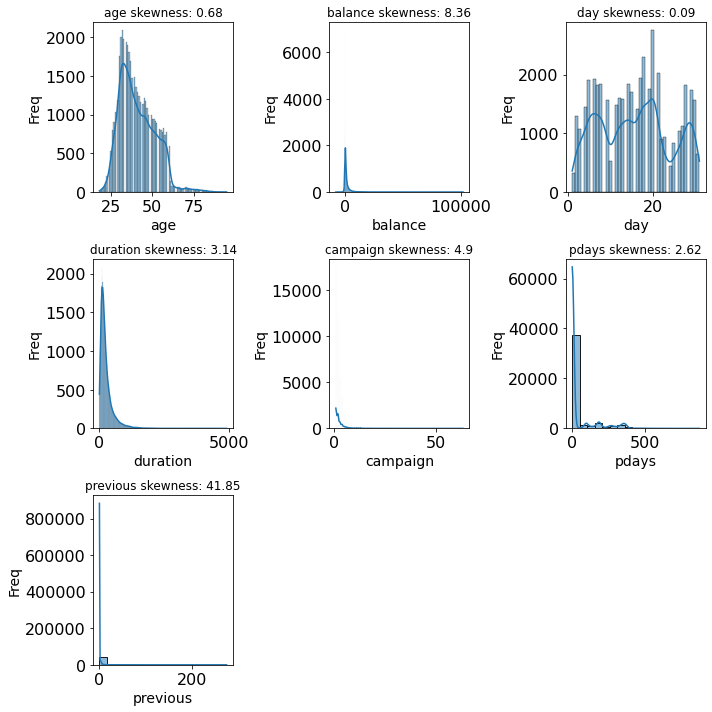

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.histplot(
        df[num_cols[i]],
        kde = True
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 14)
    ax.set_ylabel("Freq", fontsize = 14)
    ax.tick_params(labelsize=16)
    ax.set_title(str(num_cols[i]) + ' skewness: ' + str(round(num_cols_skewness[i], 2)))
plt.tight_layout()
plt.show()

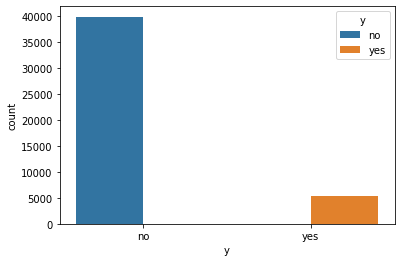

In [ ]:
sns.countplot(data=df,x="y",hue="y")
plt.show()

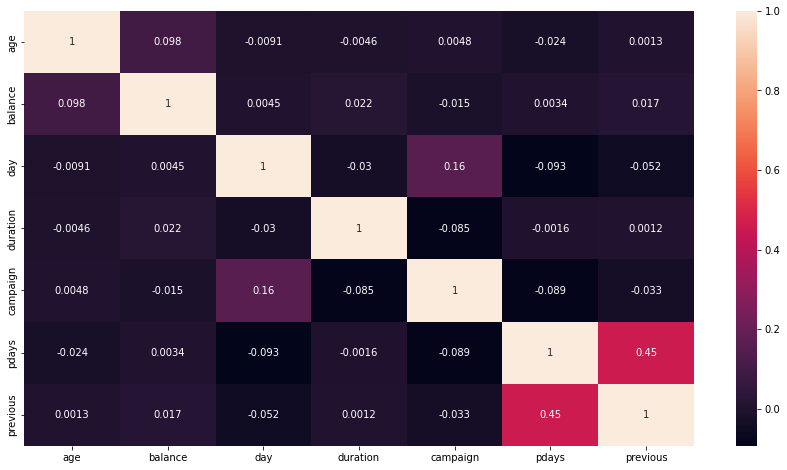

In [ ]:
corr=df.corr()
plt.figure(figsize=[15,8])
sns.heatmap(data=corr,annot=True)
plt.show()

In [ ]:
cat_cols = list(df.select_dtypes(object))
print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


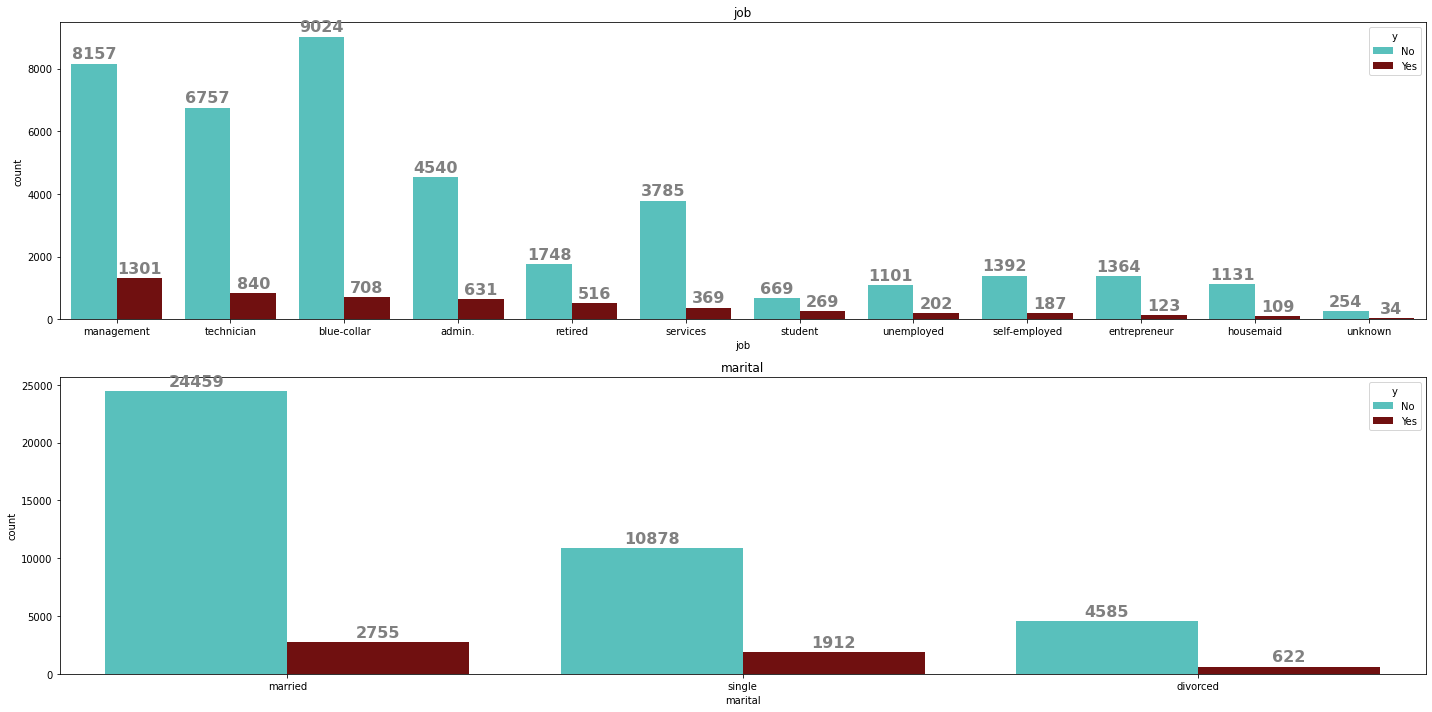

In [ ]:
# plot all categorical features
plt.figure(figsize = (20, 10))
for i in range(len(cat_cols[:2])):
    # plot
    plt.subplot(len(cat_cols[:2])//1, 1, i + 1)
    ax = sns.countplot(
        x = df[cat_cols[:2][i]],
        hue = df['y'],
        order = pd.crosstab(df[cat_cols[:2][i]], df['y']).sort_values("yes", ascending = False).index,
        palette = {"yes":"maroon", "no":"mediumturquoise"}
    )
    plt.title(cat_cols[:2][i], fontweight = 20)
    
    # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 16,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
        L = ax.legend(loc='upper right', title="y")
        L.get_texts()[0].set_text('No')
        L.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

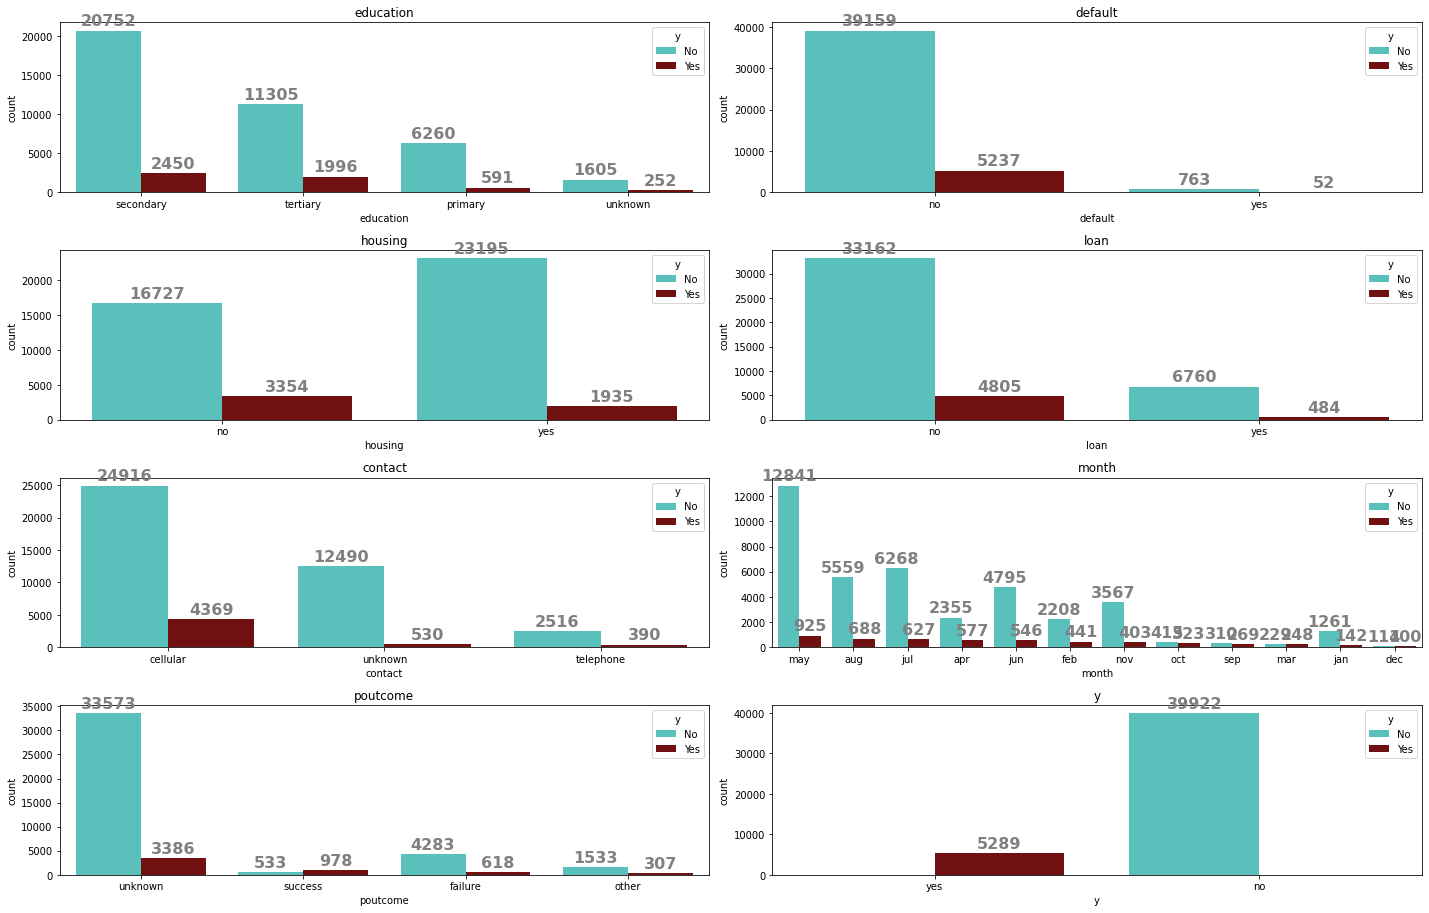

In [ ]:
plt.figure(figsize = (20, 25))
for i in range(len(cat_cols[2:])):
    plt.subplot(len(cat_cols[2:])//1, 2, i + 1)
    ax = sns.countplot(
        x = df[cat_cols[2:][i]],
        hue = df['y'],
        # order by frequency
        order = pd.crosstab(df[cat_cols[2:][i]], df['y']).sort_values("yes", ascending = False).index,
        palette = {"yes":"maroon", "no":"mediumturquoise"}
    )
    plt.title(cat_cols[2:][i], fontweight = 20)
    
    # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 16,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
        L = ax.legend(loc='upper right', title="y")
        L.get_texts()[0].set_text('No')
        L.get_texts()[1].set_text('Yes')
plt.tight_layout()

plt.show()

In [ ]:
df["target"] = df["y"].apply(lambda x: 1 if x == "yes" else 0)
df.drop(columns=["y"], inplace = True)

In [ ]:
print(df[["target"]])

       target
0           0
1           0
2           0
3           0
4           0
...       ...
45206       1
45207       1
45208       1
45209       0
45210       0

[45211 rows x 1 columns]


In [ ]:
df["job"] = df["job"].str.replace('.', '', regex = False)
df["education"] = df["education"].str.replace('.', ' ', regex = False)

In [ ]:
print(df["pdays"].value_counts())

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64


In [ ]:
X = df.drop(columns = ['target'], axis = 1)
y = df['target']

In [ ]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size = 1/3, random_state = 42, stratify = y_)

In [ ]:
print(len(X_train)/len(X), len(X_val)/len(X), len(X_test)/len(X))

0.6999845170423127 0.19999557629780362 0.10001990665988365


In [ ]:
print(sum(y_train==1)/len(y_train), sum(y_val==1)/len(y_val), sum(y_test==1)/len(y_test))

0.11663032830916042 0.11778367617783676 0.11786819991154357


In [ ]:
print(sum(y_train==1)/len(y_train), sum(y_val==1)/len(y_val), sum(y_test==1)/len(y_test))

0.11663032830916042 0.11778367617783676 0.11786819991154357


In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(X_train.job.drop_duplicates())
X_train.job = label.transform(X_train.job)

label.fit(X_train.marital.drop_duplicates())
X_train.marital = label.transform(X_train.marital)

label.fit(X_train.education.drop_duplicates())
X_train.education = label.transform(X_train.education)

label.fit(X_train.default.drop_duplicates())
X_train.default = label.transform(X_train.default)

label.fit(X_train.housing.drop_duplicates())
X_train.housing = label.transform(X_train.housing)

label.fit(X_train.loan.drop_duplicates())
X_train.loan = label.transform(X_train.loan)

label.fit(X_train.contact.drop_duplicates())
X_train.contact = label.transform(X_train.contact)

label.fit(X_train.month.drop_duplicates())
X_train.month = label.transform(X_train.month)

label.fit(X_train.day.drop_duplicates())
X_train.day = label.transform(X_train.day)

label.fit(X_train.poutcome.drop_duplicates())
X_train.poutcome = label.transform(X_train.poutcome)

In [ ]:
scaling_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])


In [ ]:
scaling_pipeline.fit(X_train)

Pipeline(steps=[('std_scaler', StandardScaler())])

In [ ]:
X_train_trf=scaling_pipeline.fit_transform(X_train)

In [ ]:
X_test_trf = scaling_pipeline.fit_transform(X_test)

In [ ]:
hyperparameters = {
    'kernel': ['poly', 'rbf']
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
svc = SVC(random_state = 42, gamma = 'auto', max_iter = 2000)
svc_grid = GridSearchCV(svc, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
svc_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto', max_iter=2000, random_state=42),
             param_grid={'kernel': ['poly', 'rbf']}, refit='auc',
             return_train_score=True, scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [ ]:
svc_grid.best_params_

{'kernel': 'rbf'}

In [ ]:
svc_pred=svc_grid.predict(X_test_trf)

In [ ]:
svc_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
predection=pd.DataFrame(svc_pred)
predection.columns=["predected_output"]
print(predection.head())

   predected_output
0                 1
1                 0
2                 0
3                 0
4                 0


In [ ]:
y_test=np.array(y_test)
Actual=pd.DataFrame(y_test)
Actual.columns=["Actual"]
print(Actual.head())

   Actual
0       1
1       0
2       0
3       0
4       0


In [ ]:
ps=pd.DataFrame()
ps["predection"]=predection.predected_output
ps["Actual"]=Actual.Actual
print(ps.head())

   predection  Actual
0           1       1
1           0       0
2           0       0
3           0       0
4           0       0


In [ ]:
svc_grid.best_score_

0.7929680005118205

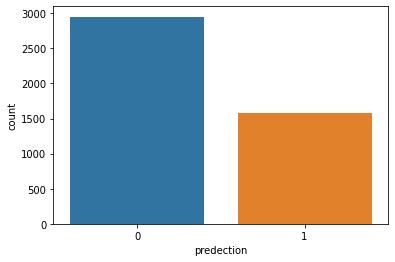

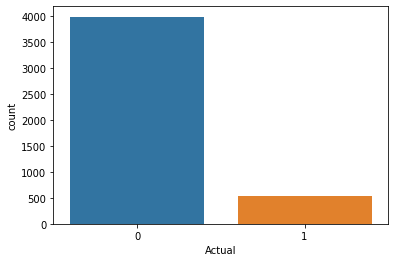

In [ ]:
sns.countplot(data=ps,x="predection")
plt.show()
sns.countplot(data=ps,x="Actual")
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predection))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predection))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predection)))

Mean Absolute Error: 0.3177797434763379
Mean Squared Error: 0.3177797434763379
Root Mean Squared Error: 0.5637195610197839
